In [1]:
# Simple Linear Regression
# Importing the libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
#%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset #show the dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


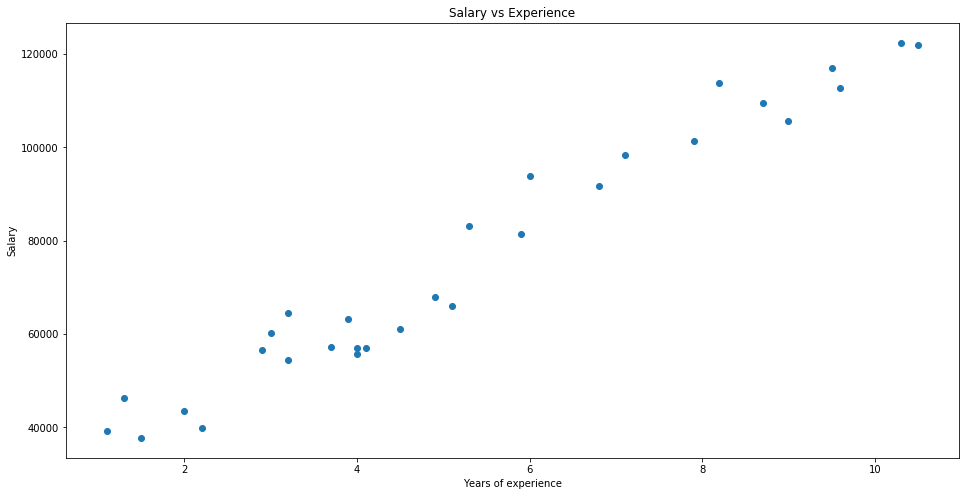

In [3]:
X = dataset.iloc[:, 0].values
Y = dataset.iloc[:, 1].values
plt.figure(figsize=(16, 8))
plt.scatter(X, Y)
plt.title('Salary vs Experience')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [4]:
X = dataset['YearsExperience'].values.reshape(-1,1) #reshape (-1,1) means unknown row and one coloum
Y = dataset['Salary'].values.reshape(-1,1)


In [5]:
# split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 


In [6]:
#training the algorithm and to import LinearRegresion() class
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) # fit() method along with our training data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[26780.09915063]
[[9312.57512673]]


In [8]:
#Predicting the Test set result
Y_pred = regressor.predict(X_test)

In [9]:
dataset = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
dataset

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


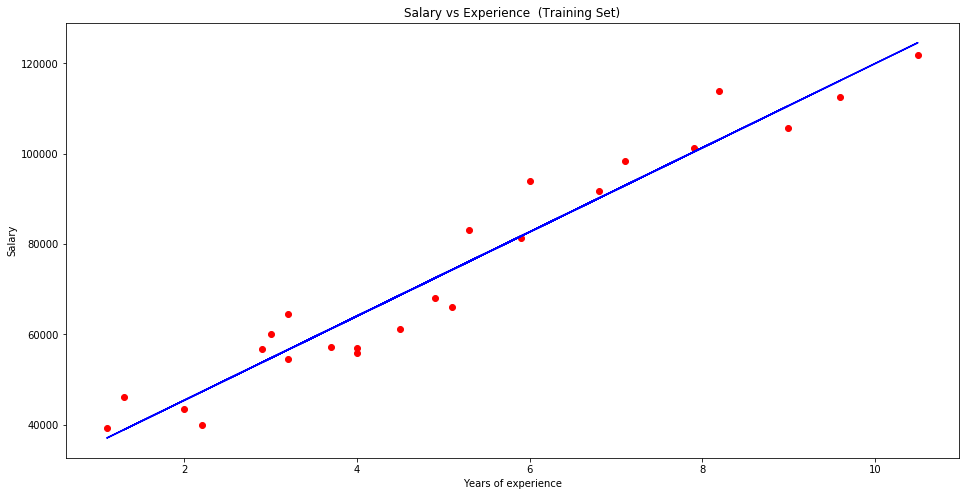

In [10]:
# Visualising the Training set results
plt.figure(figsize=(16, 8))
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()


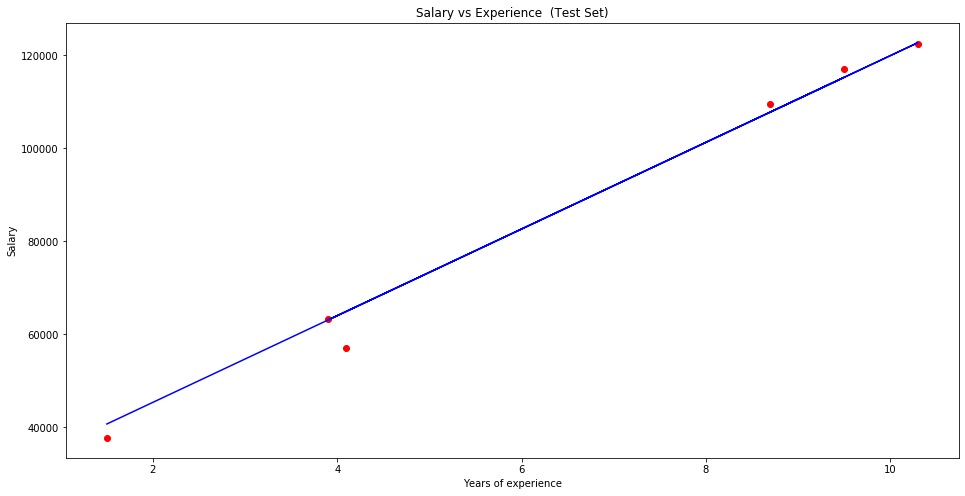

In [11]:
# Visualising the Test set results
plt.figure(figsize=(16, 8))
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience  (Test Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()


In [12]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))

Mean Squared Error: 12823412.298126549


In [13]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred) #(predict-mean)/(actual-mean)
print(score)

0.988169515729126
